### This notebook produces an edgelist from an OBJ to use as exemplary graph in the web app. 
The 3D Stanford bunny model was retrieved from sketchfab / https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj


In [24]:
import networkx as nx 
import numpy as np
import pandas as pd

## Example Obj to Graph 
code for parsing obj (modified from here: https://github.com/kohterai/OBJ-Parser/blob/master/objParser.py)

In [9]:
objFile = open('input/bunny2.obj', 'r') #'input/bunny.obj', 'r')

vertexList = []
finalVertexList = []
edgeList = []

for line in objFile:
    split = line.split()
    if not len(split):
        continue
    if split[0] == "v":
        vertexList.append(split[1:])
    elif split[0] == "f":
        count=1
        firstSet=[]
        secondSet=[]
        while count<4: #4 
            removeSlash = split[count].split(' ') # (' ') 
            if count == 1:
                node1 = int(split[count])
                firstSet.append(vertexList[int(removeSlash[0])-1])             
                secondSet.append(vertexList[int(removeSlash[0])-1])
            elif count == 2:
                node2 = int(split[count])
                firstSet.append(vertexList[int(removeSlash[0])-1])
            elif count == 3:
                node3 = int(split[count])
                firstSet.append(vertexList[int(removeSlash[0])-1])
                secondSet.append(vertexList[int(removeSlash[0])-1])
            elif count == 4:
                secondSet.append(vertexList[int(removeSlash[0])-1])
            
            count+=1
        
        edgeList.append((node1,node2))
        edgeList.append((node2,node3))
            
        finalVertexList.append(firstSet)
        finalVertexList.append(secondSet)
    

print ("Total vertices: " + str(len(vertexList)))

objFile.close()

Total vertices: 5


In [10]:
edgeList

[(1, 2), (2, 3), (1, 3), (3, 5), (2, 4), (4, 5)]

In [11]:
G_test = nx.Graph(edgeList)

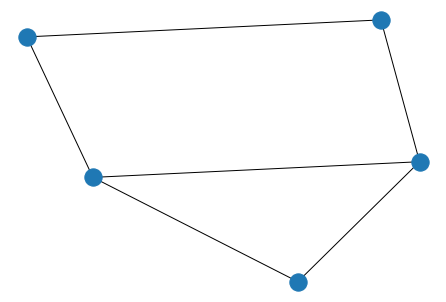

In [12]:
nx.draw(G_test) 

## Stanford Bunny to Graph

In [95]:
objFile = open('input/bunny.obj', 'r') #'input/bunny.obj', 'r')

vertexList = []
finalVertexList = []
edgeList = []

for line in objFile:
    split = line.split()
    if not len(split):
        continue
    if split[0] == "v":
        vertexList.append(split[1:])
    elif split[0] == "f":
        count=1
        firstSet=[]
        secondSet=[]
        while count<4: #4 
            removeSlash = split[count].split(' ') # (' ') 
            if count == 1:
                node1 = int(split[count])-1
                firstSet.append(vertexList[int(removeSlash[0])-1])             
                secondSet.append(vertexList[int(removeSlash[0])-1])
            elif count == 2:
                node2 = int(split[count])-1
                firstSet.append(vertexList[int(removeSlash[0])-1])
            elif count == 3:
                node3 = int(split[count])-1
                firstSet.append(vertexList[int(removeSlash[0])-1])
                secondSet.append(vertexList[int(removeSlash[0])-1])
            elif count == 4:
                secondSet.append(vertexList[int(removeSlash[0])-1])
            
            count+=1
        
        edgeList.append((str(node1),str(node2)))
        edgeList.append((str(node2),str(node3)))
            
        finalVertexList.append(firstSet)
        finalVertexList.append(secondSet)
    

print ("Total vertices: " + str(len(vertexList)))

objFile.close()

Total vertices: 2503


In [96]:
G_bunny = nx.Graph(edgeList)

### save Edgelist to text 

In [98]:
nx.write_edgelist(G_bunny, 'bunny_graph.txt',data=False) 

### read Edgelist from text 

In [99]:
G = nx.read_edgelist('bunny_graph.txt',data=False) 

### make functional feature Matrix for Stanford Bunny 

In [100]:
scale = 1
val = 0

rows = len(list(G.nodes()))
feat_one = [(val) if i%3 else (scale) for i in range(rows)]
feat_two = [(val) if i%2 or feat_one[i]==scale in feat_one else (scale) for i in range(rows)]
feat_three = [(scale) if feat_one[i]==val and feat_two[i]==val else val for i in range(rows)]
feat_matrix = np.vstack((feat_one,feat_two,feat_three))

DF_functional = pd.DataFrame(feat_matrix)
DF_functional.index = [100,101,102]
DF_functional.columns = list(G.nodes())

In [103]:
# ----------------------------------
# Visual settings based on features 
# ----------------------------------
col_one = 'orange' 
col_two = 'cornflowerblue'
col_three = 'skyblue'

colors_assigned_unsorted = {}
for i,feat in enumerate(feat_matrix):
    if i == 0:
        col = col_one
    elif i == 1:
        col = col_two
    elif i == 2: 
        col = col_three
    for j,v in enumerate(feat):
        if v == 1:
            colors_assigned_unsorted[str(j)]=col
        else:
            pass

In [105]:
colors_assigned = {key:colors_assigned_unsorted[key] for key in list(G_bunny.nodes())}
d_colors = colors_assigned 
color_list = list(colors_assigned.values())

first_groupname = 'feature1'
second_groupname = 'feature2'
third_groupname = 'feature3'
d_legend = dict(zip(set(d_colors.values()),[first_groupname,second_groupname,third_groupname]))

### save Feature matrix 

In [108]:
pd.DataFrame.to_csv(DF_functional, 'bunny_featurematrix.csv', index = 0)

# Precalculate Bunny Graph Layouts

In [110]:
from cartoGRAPHs import *

DEBUG: in init: import modules
DEBUG:in cartographs
DEBUG:in cartographs - import done
DEBUG: in init: import done


### LOCAL 

In [114]:
A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
DM_adj = A.toarray()

Matrix_local = pd.DataFrame(DM_adj, columns = list(G.nodes()), index=list(G.nodes()))

### GLOBAL

In [116]:
r = 0.9
alpha = 1.0 

DM_m = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_m_df = pd.DataFrame(DM_m)
DM_m_df.sum(axis=1) 

DM_m_df.index=list(G.nodes())
DM_m_df.columns=list(G.nodes())

DM_m_df_T = DM_m_df.T
Matrix_global = DM_m_df_T.round(6) 

### IMPORTANCE

In [121]:
# DEGREE CENTRALITY - Node degree: important nodes being involved within high number of interactions
degs = dict(G.degree())
d_deghubs = {}
for node, de in sorted(degs.items(),key = lambda x: x[1], reverse = 1):
    d_deghubs[node] = round(float(de/max(degs.values())),4)

In [122]:
# CLOSENESS CENTRALITY - Measures how closely a node is connected to all other nodes to highlight f.ex. core-periphery structure, or identify central nodes
closeness = nx.closeness_centrality(G)
d_clos = {}
for node, cl in sorted(closeness.items(), key = lambda x: x[1], reverse = 1):
    d_clos[node] = round(cl,4)

In [127]:
# BETWEENESS CENTRALITY - How many shortest paths between pairs of other nodes in the network go through one node. High BC indicates "bottleneck nodes" in the network
betweens = nx.betweenness_centrality(G)
d_betw = {}
for node, be in sorted(betweens.items(), key = lambda x: x[1], reverse = 1):
     d_betw[node] = round(be,4)

In [124]:
# EIGENVECTOR CENTRALITY - Compute the eigenvector centrality for the graph
eigen = nx.eigenvector_centrality_numpy(G)
d_eigen = {}
for node, eig in sorted(eigen.items(), key = lambda x: x[1], reverse = 1):
     d_eigen[node] = round(eig,4)  

In [128]:
d_deghubs_sorted = {key:d_deghubs[key] for key in sorted(d_deghubs.keys())}
d_clos_sorted = {key:d_clos[key] for key in sorted(d_clos.keys())}
d_betw_sorted = {key:d_betw[key] for key in sorted(d_betw.keys())}
d_eigen_sorted = {key:d_eigen[key] for key in sorted(d_eigen.keys())}

# feature collection
feature_dict = dict(zip(d_deghubs_sorted.keys(), zip(
                                                     d_deghubs_sorted.values(), 
                                                     d_clos_sorted.values(), 
                                                     d_betw_sorted.values(), 
                                                     d_eigen_sorted.values(),
                                                    )))

# IMPORTANT :
# sort all feature according to Graph node IDs
feature_dict_sorted = {key:feature_dict[key] for key in G.nodes()}
Matrix_importance = pd.DataFrame.from_dict(feature_dict_sorted, orient = 'index', columns = ['degs', 
                                                                                      'clos', 
                                                                                      'betw', 
                                                                                      'eigen',
                                                                                      ])

### FUNCTIONAL

In [136]:
Matrix_functional = pd.read_csv('input/bunny_featurematrix.csv')
Matrix_functional.columns = list(G.nodes())

# LAYOUTS

In [153]:
%%time 

n_n = 8 #20  
spr = 1.0 #1.0 #0.9  
md = 0.1 #0.1 #0.25 

posG3D = layout_portrait_umap(G,
                                   Matrix_global,
                                   3,
                                   n_neighbors=n_n, 
                                   spread=spr, 
                                   min_dist=md, 
                                   metric='cosine'
                                  )

CPU times: user 19 s, sys: 279 ms, total: 19.3 s
Wall time: 18.7 s


In [154]:
plot_3Dfigure(G, posG3D, 
              d_features = None, 
              d_colors = None, 
              d_size = None, 
              d_legend = None, 
              path = '', 
              fname = 'Portrait_3D', 
              scheme = 'light',
              #with_edges = False
             )

'Portrait_3D.html'

In [ ]:
export_to_csv3D(path = '', 
                layout_namespace = 'Portrait_3D', 
                posG = posG3D, 
                colors = None
               )